In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
data=pd.read_csv("OnlineArticlesPopularity_regression.csv")

In [26]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38643 entries, 0 to 38642
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          38643 non-null  object 
 1   title                        38643 non-null  object 
 2    timedelta                   38643 non-null  int64  
 3    n_tokens_content            38643 non-null  int64  
 4    n_unique_tokens             38643 non-null  float64
 5    n_non_stop_words            38643 non-null  float64
 6    n_non_stop_unique_tokens    38643 non-null  float64
 7    num_hrefs                   38643 non-null  int64  
 8    num_self_hrefs              38643 non-null  int64  
 9    num_imgs                    38643 non-null  int64  
 10   num_videos                  38643 non-null  int64  
 11   average_token_length        38643 non-null  float64
 12   num_keywords                38643 non-null  int64  
 13  channel type    

In [27]:
X = data.drop(columns=[' shares', 'url', 'title'])
y = data[' shares']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
X_train.head(38643)

,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity
10838,62,124,0.827869,1.0,0.913580,0,0,1,1,4.959677,...,0.024194,0.040323,0.375000,0.625000,0.383333,0.250000,0.5,-0.200952,-0.333333,-0.071429
3442,246,404,0.611253,1.0,0.732794,15,4,0,1,4.633663,...,0.059406,0.012376,0.827586,0.172414,0.402628,0.100000,1.0,-0.207778,-0.291667,-0.100000
10364,686,284,0.575972,1.0,0.762500,1,0,1,1,4.690141,...,0.059859,0.017606,0.772727,0.227273,0.340514,0.033333,0.8,-0.194444,-0.300000,-0.100000
25088,603,160,0.664516,1.0,0.787879,2,0,1,0,4.625000,...,0.031250,0.006250,0.833333,0.166667,0.339000,0.160000,0.6,-0.071429,-0.071429,-0.071429
16215,255,1054,0.403865,1.0,0.570248,6,6,11,1,4.247628,...,0.047438,0.013283,0.781250,0.218750,0.411989,0.050000,1.0,-0.232738,-0.500000,-0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,253,563,0.486339,1.0,0.638037,7,3,3,0,4.774423,...,0.042629,0.028419,0.600000,0.400000,0.332418,0.033333,0.9,-0.322135,-0.800000,-0.050000
32103,17,98,0.730337,1.0,0.836364,2,1,2,0,4.428571,...,0.040816,0.020408,0.666667,0.333333,0.371591,0.136364,0.5,-0.125000,-0.150000,-0.100000
30403,303,325,0.535604,1.0,0.684466,30,3,25,1,5.372308,...,0.027692,0.018462,0.600000,0.400000,0.385185,0.100000,0.5,-0.352778,-0.600000,-0.066667
21243,433,98,0.742268,1.0,0.844828,6,5,0,0,4.469388,...,0.071429,0.020408,0.777778,0.222222,0.393290,0.136364,0.8,-0.100000,-0.100000,-0.100000


In [29]:
X_train.describe()

,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity
count,30914.000000,30914.000000,30914.000000,30914.000000,30914.000000,30914.000000,30914.000000,30914.000000,30914.000000,30914.000000,...,30914.000000,30914.000000,30914.000000,30914.000000,30914.000000,30914.000000,30914.000000,30914.000000,30914.000000,30914.000000
mean,354.290839,547.283496,0.552908,1.003558,0.693426,10.894999,3.304522,4.554053,1.260206,4.547487,...,0.039621,0.016599,0.681734,0.287988,0.353310,0.095149,0.756485,-0.259628,-0.521711,-0.107604
std,214.178458,472.753862,3.986293,5.923338,3.696277,11.189855,3.890551,8.297945,4.155187,0.848192,...,0.017452,0.010768,0.190533,0.156144,0.104351,0.071011,0.247971,0.127640,0.289905,0.095065
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,164.000000,247.000000,0.470753,1.000000,0.625442,4.000000,1.000000,1.000000,0.000000,4.478830,...,0.028409,0.009615,0.600000,0.185185,0.305993,0.050000,0.600000,-0.328316,-0.700000,-0.125000
50%,338.000000,410.000000,0.539432,1.000000,0.690372,8.000000,3.000000,1.000000,0.000000,4.664727,...,0.038968,0.015333,0.710526,0.279070,0.358333,0.100000,0.800000,-0.253333,-0.500000,-0.100000
75%,542.000000,716.000000,0.607958,1.000000,0.754011,14.000000,4.000000,4.000000,1.000000,4.855885,...,0.050336,0.021739,0.800000,0.384615,0.410880,0.100000,1.000000,-0.186667,-0.300000,-0.050000
max,731.000000,8474.000000,701.000000,1042.000000,650.000000,187.000000,116.000000,128.000000,91.000000,8.041534,...,0.155488,0.162037,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000


In [30]:
X_train.isnull().sum()

 timedelta                     0
 n_tokens_content              0
 n_unique_tokens               0
 n_non_stop_words              0
 n_non_stop_unique_tokens      0
 num_hrefs                     0
 num_self_hrefs                0
 num_imgs                      0
 num_videos                    0
 average_token_length          0
 num_keywords                  0
channel type                   0
 kw_min_min                    0
 kw_max_min                    0
 kw_avg_min                    0
 kw_min_max                    0
 kw_max_max                    0
 kw_avg_max                    0
 kw_min_avg                    0
 kw_max_avg                    0
 kw_avg_avg                    0
 self_reference_min_shares     0
 self_reference_max_shares     0
 self_reference_avg_sharess    0
weekday                        0
isWeekEnd                      0
 LDA_00                        0
 LDA_01                        0
 LDA_02                        0
 LDA_03                        0
 LDA_04   

In [31]:
X_train.head(50)

,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity
10838,62,124,0.827869,1.0,0.913580,0,0,1,1,4.959677,...,0.024194,0.040323,0.375000,0.625000,0.383333,0.250000,0.50,-0.200952,-0.333333,-0.071429
3442,246,404,0.611253,1.0,0.732794,15,4,0,1,4.633663,...,0.059406,0.012376,0.827586,0.172414,0.402628,0.100000,1.00,-0.207778,-0.291667,-0.100000
10364,686,284,0.575972,1.0,0.762500,1,0,1,1,4.690141,...,0.059859,0.017606,0.772727,0.227273,0.340514,0.033333,0.80,-0.194444,-0.300000,-0.100000
25088,603,160,0.664516,1.0,0.787879,2,0,1,0,4.625000,...,0.031250,0.006250,0.833333,0.166667,0.339000,0.160000,0.60,-0.071429,-0.071429,-0.071429
16215,255,1054,0.403865,1.0,0.570248,6,6,11,1,4.247628,...,0.047438,0.013283,0.781250,0.218750,0.411989,0.050000,1.00,-0.232738,-0.500000,-0.100000
13224,292,184,0.587912,1.0,0.695652,2,1,0,2,4.472826,...,0.048913,0.005435,0.900000,0.100000,0.205892,0.100000,0.50,-0.155556,-0.155556,-0.155556
28939,688,247,0.603448,1.0,0.712329,6,4,1,0,4.765182,...,0.028340,0.012146,0.700000,0.300000,0.383333,0.100000,0.75,-0.216667,-0.300000,-0.100000
2642,257,1207,0.381956,1.0,0.564024,15,7,3,0,4.466446,...,0.054681,0.021541,0.717391,0.282609,0.224397,0.050000,0.70,-0.279113,-0.700000,-0.100000
37166,306,1954,0.462212,1.0,0.603274,15,9,51,0,4.738485,...,0.027636,0.016377,0.627907,0.372093,0.397951,0.050000,1.00,-0.308697,-0.800000,-0.050000
22021,570,482,0.461053,1.0,0.585616,9,5,5,0,4.477178,...,0.053942,0.035270,0.604651,0.395349,0.392343,0.136364,1.00,-0.383824,-0.800000,-0.125000


In [32]:
X_train.duplicated()
sum(X_train.duplicated())

0

In [33]:
X_train['channel type'].unique()


array([' data_channel_is_entertainment', ' data_channel_is_world',
       ' data_channel_is_bus', ' data_channel_is_tech', '[]',
       ' data_channel_is_socmed', ' data_channel_is_lifestyle'],
      dtype=object)

In [34]:
X_train['channel type'].value_counts()

channel type
 data_channel_is_world            6569
 data_channel_is_tech             5723
 data_channel_is_entertainment    5503
 data_channel_is_bus              4915
[]                                4770
 data_channel_is_socmed           1815
 data_channel_is_lifestyle        1619
Name: count, dtype: int64

In [35]:
#mod=data['channel type'].mode()
#print(mod)
#data['channel type']=data['channel type'].replace("[]","data_channel_is_world")

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_columns = ['channel type', 'weekday', 'isWeekEnd']

for col in categorical_columns:
    mode_value = X_train[col].mode()[0]
    X_train[col].fillna(mode_value, inplace=True)
    X_train[col] = X_train[col].replace("[]", mode_value)

    X_train[col] = encoder.fit(X_train[col])
    unseen_categories = set(X_train[col].unique()) - set(encoder.classes_)
    # Replace unseen categories with a known category (e.g., mode) or a default value
    if unseen_categories:
        X_train[col] = X_train[col].apply(lambda x: mode_value if x not in encoder.classes_ else x)
    
    X_train[col] = encoder.fit_transform(X_train[col])


X_train[categorical_columns] = X_train[categorical_columns].astype(int)


C:\Users\hp\AppData\Local\Temp\ipykernel_10332\760112014.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(mode_value, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_10332\760112014.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [37]:

numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X_train[numeric_columns])

In [38]:
X_train.head(20)

,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity
10838,62,124,0.827869,1.0,0.913580,0,0,1,1,4.959677,...,0.024194,0.040323,0.375000,0.625000,0.383333,0.250000,0.50,-0.200952,-0.333333,-0.071429
3442,246,404,0.611253,1.0,0.732794,15,4,0,1,4.633663,...,0.059406,0.012376,0.827586,0.172414,0.402628,0.100000,1.00,-0.207778,-0.291667,-0.100000
10364,686,284,0.575972,1.0,0.762500,1,0,1,1,4.690141,...,0.059859,0.017606,0.772727,0.227273,0.340514,0.033333,0.80,-0.194444,-0.300000,-0.100000
25088,603,160,0.664516,1.0,0.787879,2,0,1,0,4.625000,...,0.031250,0.006250,0.833333,0.166667,0.339000,0.160000,0.60,-0.071429,-0.071429,-0.071429
16215,255,1054,0.403865,1.0,0.570248,6,6,11,1,4.247628,...,0.047438,0.013283,0.781250,0.218750,0.411989,0.050000,1.00,-0.232738,-0.500000,-0.100000
13224,292,184,0.587912,1.0,0.695652,2,1,0,2,4.472826,...,0.048913,0.005435,0.900000,0.100000,0.205892,0.100000,0.50,-0.155556,-0.155556,-0.155556
28939,688,247,0.603448,1.0,0.712329,6,4,1,0,4.765182,...,0.028340,0.012146,0.700000,0.300000,0.383333,0.100000,0.75,-0.216667,-0.300000,-0.100000
2642,257,1207,0.381956,1.0,0.564024,15,7,3,0,4.466446,...,0.054681,0.021541,0.717391,0.282609,0.224397,0.050000,0.70,-0.279113,-0.700000,-0.100000
37166,306,1954,0.462212,1.0,0.603274,15,9,51,0,4.738485,...,0.027636,0.016377,0.627907,0.372093,0.397951,0.050000,1.00,-0.308697,-0.800000,-0.050000
22021,570,482,0.461053,1.0,0.585616,9,5,5,0,4.477178,...,0.053942,0.035270,0.604651,0.395349,0.392343,0.136364,1.00,-0.383824,-0.800000,-0.125000


In [39]:
numeric_columns_corr = data.select_dtypes(include=['float64', 'int64']).columns
corrMatrix = data[numeric_columns_corr].corr()
print("DataFrame columns:", data.columns)
print("Correlation matrix columns:", corrMatrix.columns)


DataFrame columns: Index(['url', 'title', ' timedelta', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'channel type', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', 'weekday', 'isWeekEnd', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' shares'],

In [40]:
# Select correlation with 'shares' column
corr_shares = corrMatrix[' shares']

Text(0, 0.5, 'Count')

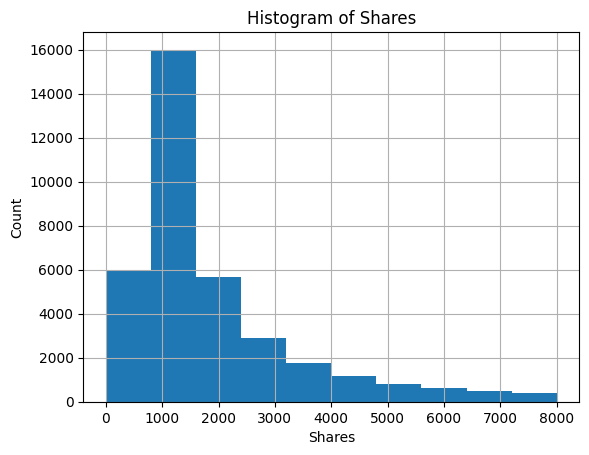

In [41]:
plt.clf()
np.random.seed(1)
plt.style.use('default')
plt.subplot()
data[' shares'].hist(bins = 10,range = (1,8000))
plt.title('Histogram of Shares')
plt.xlabel('Shares')
plt.ylabel('Count')

In [42]:
top_feature = corrMatrix[corr_shares.abs() > 0.01].index
#top_feature = data.drop(columns=low_corr_cols)
#print("Dropped columns:", low_corr_cols)
top_feature=top_feature.drop([' shares'])

print("Shape of filtered DataFrame:", top_feature.shape)
print("Top features for training:", top_feature)



Shape of filtered DataFrame: (24,)
Top features for training: Index([' num_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' kw_max_min', ' kw_avg_min', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' LDA_01', ' LDA_02', ' LDA_03',
       ' LDA_04', ' global_subjectivity', ' rate_positive_words',
       ' avg_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity'],
      dtype='object')


In [43]:

X_train_selected = X_train[top_feature]
X_test_selected = X_test[top_feature]

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression RMSE: 8460.095846773043
Linear Regression R^2 Score: 2.132294007006008


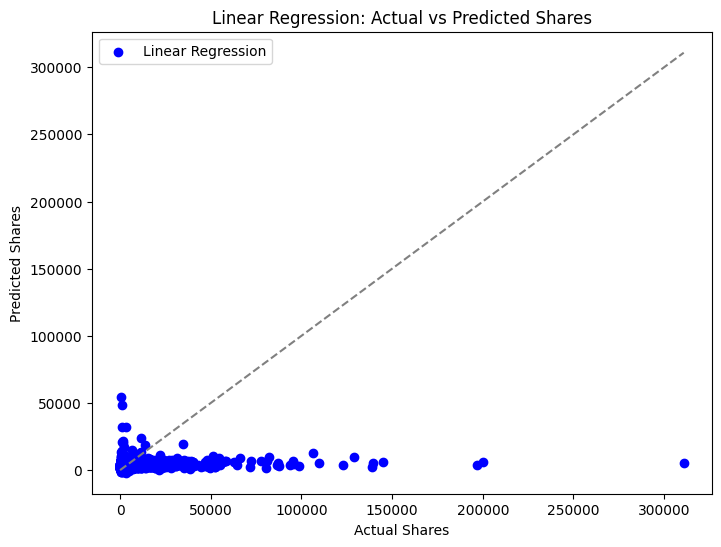

In [44]:

# Train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_linear = linear_reg_model.predict(X_test_selected)

# Evaluate the model
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
linear_r2 = r2_score(y_test, y_pred_linear)

# Display model performance
print("Linear Regression RMSE:", linear_rmse)
print("Linear Regression R^2 Score:", linear_r2 * 100)

# Plot actual vs predicted shares
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Linear Regression: Actual vs Predicted Shares')
plt.legend()
plt.show()

In [45]:
import pickle
pkl_file = "script.pkl"
with open(pkl_file, 'wb') as file:
    pickle.dump(linear_reg_model, file)
    pickle.dump(scaler, file)
    pickle.dump(encoder, file)
    pickle.dump(mode_value, file)
    pickle.dump(top_feature, file)



In [46]:
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=0)
random_forest_model.fit(X_train_selected, y_train)
y_pred_rf = random_forest_model.predict(X_test_selected)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2_train = random_forest_model.score(X_train, y_train)
rf_r2_test = random_forest_model.score(X_test, y_test)
print("Random Forest Regression Training R^2 Score:", rf_r2_train)
print("Random Forest Regression Testing R^2 Score:", rf_r2_test)
print("Random Forest Regression RMSE:", rf_rmse)
print("Random Forest Regression R^2 Score:", rf_r2)
# Scatter plot for Random Forest Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='gray')  # Line of best fit
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Random Forest Regression: Actual vs Predicted Shares')
plt.legend()
plt.show()



In [ ]:
from sklearn.linear_model import Ridge

poly_reg_model_2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg_model_2.fit(X_train_selected, y_train)

y_pred_poly_2 = poly_reg_model_2.predict(X_test_selected)

poly_2_rmse = mean_squared_error(y_test, y_pred_poly_2, squared=False)

poly_2_r2 = r2_score(y_test, y_pred_poly_2)
poly_2_r2_train = poly_reg_model_2.score(X_train, y_train)
poly_2_r2_test = poly_reg_model_2.score(X_test, y_test)

print("Polynomial Regression Training R^2 Score:", poly_2_r2_train)
print("Polynomial Regression Testing R^2 Score:", poly_2_r2_test)
print("Polynomial Regression (Degree 2) RMSE:", poly_2_rmse)
print("Polynomial Regression (Degree 2) R^2 Score:", poly_2_r2)

# Scatter plot for Polynomial Regression (Degree 2)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly_2, color='orange', label='Polynomial Regression (Degree 2)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')  # Line of best fit
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Polynomial Regression (Degree 2): Actual vs Predicted Shares')
plt.legend()
plt.show()

In [ ]:
# Ridge Regression
ridge_reg_model = Ridge(alpha=0.5)
ridge_reg_model.fit(X_train_selected, y_train)
y_pred_ridge = ridge_reg_model.predict(X_test_selected)

ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = ridge_reg_model.score(X_test, y_test)
ridge_r2_train = ridge_reg_model.score(X_train, y_train)
ridge_r2_test = ridge_reg_model.score(X_test, y_test)

print("Ridge Regression Training R^2 Score:", ridge_r2_train)
print("Ridge Regression Testing R^2 Score:", ridge_r2_test)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression R^2 Score:", ridge_r2)

# Scatter plot for Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='red', label='Ridge Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')  # Line of best fit
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Ridge Regression: Actual vs Predicted Shares')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_selected, y_train)
y_pred_svr = svr_model.predict(X_test_selected)
svr_rmse = mean_squared_error(y_test, y_pred_svr, squared=False)
svr_r2 = r2_score(y_test, y_pred_svr)
svr_r2_train = svr_model.score(X_train, y_train)
svr_r2_test = svr_model.score(X_test, y_test)

print("Ridge Regression Training R^2 Score:", svr_r2_train)
print("Ridge Regression Testing R^2 Score:", svr_r2_test)
print("SVR RMSE:", svr_rmse)
print("SVR R^2 Score:", svr_r2)

# Scatter plot for SVR
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, color='purple', label='SVR')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')  # Line of best fit
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('SVR: Actual vs Predicted Shares')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

decision_tree_model = DecisionTreeRegressor(random_state=0)

decision_tree_model.fit(X_train_selected, y_train)

y_pred_dt = decision_tree_model.predict(X_test_selected)

dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
dt_r2 = r2_score(y_test, y_pred_dt)

dt_r2_train = decision_tree_model.score(X_train, y_train)
dt_r2_test = decision_tree_model.score(X_test, y_test)

print("decision tree Training R^2 Score:", dt_r2_train)
print("decision tree Testing R^2 Score:", dt_r2_test)
print("decision tree Regression RMSE:", dt_rmse)
print("decision tree Regression R^2 Score:", dt_r2)
# Scatter plot for decision tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='purple', label='decision tree')
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('decision tree: Actual vs Predicted Shares')
plt.legend()
plt.show()